In [ ]:
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, normalize
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from xgboost import XGBClassifier
from sklearn.cluster import KMeans

data_set='drive/MyDrive/Colab Notebooks/creditcard.csv'

In [ ]:
def dataset_summary(train_X, test_X, train_y, test_y):
    
    print()
    print("---------Dataset Summary----------")
    print("Total training samples:", len(train_X))
    print("Total training samples corresponding to class 0:", len(train_y[train_y[:]==0]))
    print("Total training samples corresponding to class 1:", len(train_y[train_y[:]==1]))
    print()
    print("Total testing samples:", len(test_X))
    print("Total testing samples corresponding to class 0:", len(test_y[test_y[:]==0]))
    print("Total testing samples corresponding to class 1:", len(test_y[test_y[:]==1]))
    print("----------------------------------")
    print()

In [ ]:
def oversampling(X, y):
    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(X, y)
    return X_over, y_over

In [ ]:
def undersampling(X, y):
    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_under, y_under = undersample.fit_resample(X, y)
    return X_under, y_under

In [ ]:
#importing the data

def read_dataset(csv_file_path,isOverSampling=False,isUnderSampling=False, isScaling=False ,test_size=0.2, random_state=100):
    df = pd.read_csv(csv_file_path)
    df = df.drop(['Amount','Time'], axis=1)
    
    y = df['Class']
    X = df.drop(['Class'], axis=1)
    
    if isOverSampling:
        print("With over Sampling")
        X,y=oversampling(X,y)
    elif isUnderSampling:
        X,y=undersampling(X,y)
        print("With under Sampling")
    else:
        print("Without Sampling")
    
    #random state is for reproducing the same training and testing set,if we do not use this then
    #every time it will give different sets

    #spliting the data set into training and testing set
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = test_size, random_state=random_state)
    
    if isScaling:
        print("MinMax Scalling is done")
        #MinMax scaling
        scaler = MinMaxScaler()
        train_X = scaler.fit_transform(train_X)
        test_X = scaler.transform(test_X)
    
    return train_X, test_X, train_y, test_y

In [ ]:
def classifier(X_train,Y_train,X_test,cat="entropy"):
    clf = KNeighborsClassifier()
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    return y_pred

In [ ]:
def classifier_xgboost(X_train,Y_train,X_test,cat="entropy"):
    clf = XGBClassifier(n_estimators=5000, learning_rate=0.01, subsample=0.8, max_depth=15, colsample_bytree=0.8, tree_method='gpu_hist')
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    return y_pred

In [ ]:
def classifier_KMeansClustering(X_train, Y_train, X_test):
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    kmeans = KMeans(n_clusters=2, random_state=0, algorithm="full", max_iter=10000)
    kmeans.fit(X_train)
    kmeans_predicted_cluster_for_train = kmeans.predict(X_train)
    tn, fp, fn, tp = confusion_matrix(Y_train, kmeans_predicted_cluster_for_train).ravel()
    reversed_cluster = False
    if tn+tp<fn+fp:
        reversed_cluster = True
    kmeans_predicted_cluster_for_test = kmeans.predict(X_test)
    if reversed_cluster:
        kmeans_predicted_cluster_for_test = 1 - kmeans_predicted_cluster_for_test
    return kmeans_predicted_cluster_for_test


In [ ]:
def evaluate(Y_test,y_predict):
    conf_matrix = confusion_matrix(Y_test,y_predict)
    print("Confusion Matrix",)
    print ("Accuracy : ",accuracy_score(Y_test,y_predict)*100)
    print("Report : ",classification_report(Y_test,y_predict))
    
    sns.heatmap(conf_matrix, annot=True, fmt='g')

KNN

Without Sampling

---------Dataset Summary----------
Total training samples: 227845
Total training samples corresponding to class 0: 227449
Total training samples corresponding to class 1: 396

Total testing samples: 56962
Total testing samples corresponding to class 0: 56866
Total testing samples corresponding to class 1: 96
----------------------------------

Confusion Matrix
Accuracy :  99.92451107756047
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.80      0.73      0.77        96

    accuracy                           1.00     56962
   macro avg       0.90      0.86      0.88     56962
weighted avg       1.00      1.00      1.00     56962



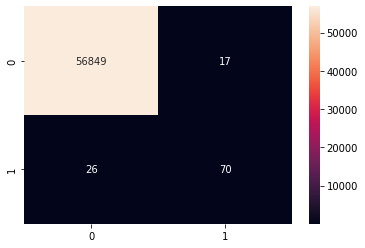

In [ ]:
train_X, test_X, train_y, test_y = read_dataset(data_set,False, False)
dataset_summary(train_X, test_X, train_y, test_y)

y_predict=classifier(train_X,train_y,test_X)
evaluate(test_y,y_predict)

With under Sampling

---------Dataset Summary----------
Total training samples: 787
Total training samples corresponding to class 0: 386
Total training samples corresponding to class 1: 401

Total testing samples: 197
Total testing samples corresponding to class 0: 106
Total testing samples corresponding to class 1: 91
----------------------------------

Confusion Matrix
Accuracy :  94.41624365482234
Report :                precision    recall  f1-score   support

           0       0.91      0.99      0.95       106
           1       0.99      0.89      0.94        91

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



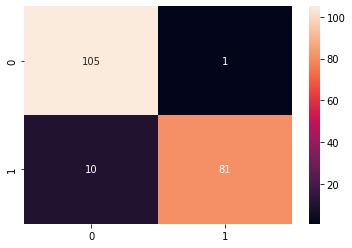

In [ ]:
train_X, test_X, train_y, test_y = read_dataset(data_set,False, True)
dataset_summary(train_X, test_X, train_y, test_y)

y_predict=classifier(train_X,train_y,test_X)
evaluate(test_y,y_predict)

With over Sampling

---------Dataset Summary----------
Total training samples: 454904
Total training samples corresponding to class 0: 227735
Total training samples corresponding to class 1: 227169

Total testing samples: 113726
Total testing samples corresponding to class 0: 56580
Total testing samples corresponding to class 1: 57146
----------------------------------

Confusion Matrix
Accuracy :  99.95603467984454
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56580
           1       1.00      1.00      1.00     57146

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



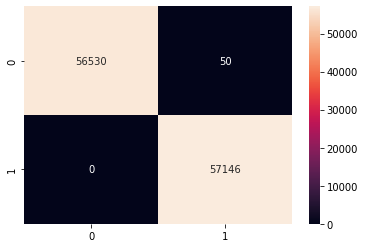

In [ ]:
train_X, test_X, train_y, test_y = read_dataset(data_set,True, False)
dataset_summary(train_X, test_X, train_y, test_y)

y_predict=classifier(train_X,train_y,test_X)
evaluate(test_y,y_predict)


XGB

Without Sampling

---------Dataset Summary----------
Total training samples: 227845
Total training samples corresponding to class 0: 227449
Total training samples corresponding to class 1: 396

Total testing samples: 56962
Total testing samples corresponding to class 0: 56866
Total testing samples corresponding to class 1: 96
----------------------------------

Confusion Matrix
Accuracy :  99.9420666409185
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.73      0.81        96

    accuracy                           1.00     56962
   macro avg       0.95      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



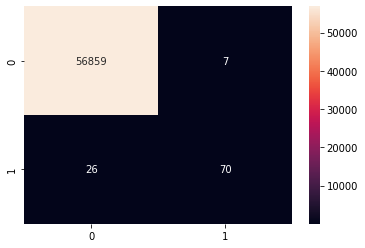

In [ ]:
train_X, test_X, train_y, test_y = read_dataset(data_set,False, False)
dataset_summary(train_X, test_X, train_y, test_y)

y_predict=classifier_xgboost(train_X,train_y,test_X)
evaluate(test_y,y_predict)


With under Sampling

---------Dataset Summary----------
Total training samples: 787
Total training samples corresponding to class 0: 386
Total training samples corresponding to class 1: 401

Total testing samples: 197
Total testing samples corresponding to class 0: 106
Total testing samples corresponding to class 1: 91
----------------------------------

Confusion Matrix
Accuracy :  91.87817258883248
Report :                precision    recall  f1-score   support

           0       0.92      0.92      0.92       106
           1       0.91      0.91      0.91        91

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



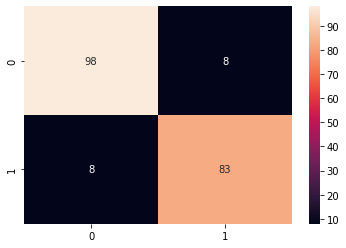

In [ ]:
train_X, test_X, train_y, test_y = read_dataset(data_set,False, True)
dataset_summary(train_X, test_X, train_y, test_y)

y_predict=classifier_xgboost(train_X,train_y,test_X)
evaluate(test_y,y_predict)


With over Sampling

---------Dataset Summary----------
Total training samples: 454904
Total training samples corresponding to class 0: 227735
Total training samples corresponding to class 1: 227169

Total testing samples: 113726
Total testing samples corresponding to class 0: 56580
Total testing samples corresponding to class 1: 57146
----------------------------------

Confusion Matrix
Accuracy :  99.9903276295658
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56580
           1       1.00      1.00      1.00     57146

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



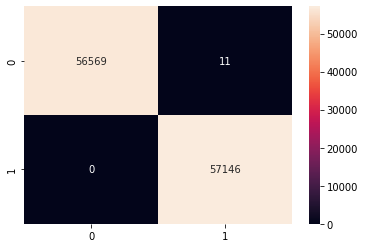

In [ ]:
train_X, test_X, train_y, test_y = read_dataset(data_set,True, False)
dataset_summary(train_X, test_X, train_y, test_y)

y_predict=classifier_xgboost(train_X,train_y,test_X)
evaluate(test_y,y_predict)


KMeans

Without Sampling

---------Dataset Summary----------
Total training samples: 227845
Total training samples corresponding to class 0: 227449
Total training samples corresponding to class 1: 396

Total testing samples: 56962
Total testing samples corresponding to class 0: 56866
Total testing samples corresponding to class 1: 96
----------------------------------

Confusion Matrix
Accuracy :  52.73691232751659
Report :                precision    recall  f1-score   support

           0       1.00      0.53      0.69     56866
           1       0.00      0.16      0.00        96

    accuracy                           0.53     56962
   macro avg       0.50      0.34      0.35     56962
weighted avg       1.00      0.53      0.69     56962



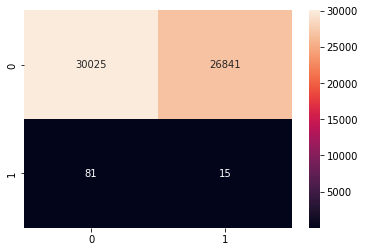

In [ ]:
train_X, test_X, train_y, test_y = read_dataset(data_set,False, False)
dataset_summary(train_X, test_X, train_y, test_y)

y_predict=classifier_KMeansClustering(train_X,train_y,test_X)
evaluate(test_y,y_predict)


With under Sampling

---------Dataset Summary----------
Total training samples: 787
Total training samples corresponding to class 0: 386
Total training samples corresponding to class 1: 401

Total testing samples: 197
Total testing samples corresponding to class 0: 106
Total testing samples corresponding to class 1: 91
----------------------------------

Confusion Matrix
Accuracy :  91.37055837563452
Report :                precision    recall  f1-score   support

           0       0.86      1.00      0.93       106
           1       1.00      0.81      0.90        91

    accuracy                           0.91       197
   macro avg       0.93      0.91      0.91       197
weighted avg       0.93      0.91      0.91       197



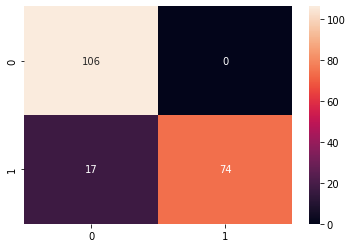

In [ ]:
train_X, test_X, train_y, test_y = read_dataset(data_set,False, True)
dataset_summary(train_X, test_X, train_y, test_y)

y_predict=classifier_KMeansClustering(train_X,train_y,test_X)
evaluate(test_y,y_predict)


With over Sampling

---------Dataset Summary----------
Total training samples: 454904
Total training samples corresponding to class 0: 227735
Total training samples corresponding to class 1: 227169

Total testing samples: 113726
Total testing samples corresponding to class 0: 56580
Total testing samples corresponding to class 1: 57146
----------------------------------

Confusion Matrix
Accuracy :  89.96799324692682
Report :                precision    recall  f1-score   support

           0       0.83      1.00      0.91     56580
           1       1.00      0.80      0.89     57146

    accuracy                           0.90    113726
   macro avg       0.92      0.90      0.90    113726
weighted avg       0.92      0.90      0.90    113726



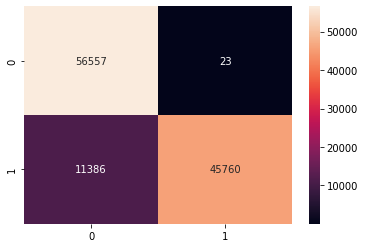

In [ ]:
train_X, test_X, train_y, test_y = read_dataset(data_set,True, False)
dataset_summary(train_X, test_X, train_y, test_y)

y_predict=classifier_KMeansClustering(train_X,train_y,test_X)
evaluate(test_y,y_predict)
